# Fires Dataset - EDA

Ernie Sumoso - 881591

First, let's import the required libraries and read our dataset into a Data Frame from Pandas.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the data from the CSV file into a Pandas dataframe
df = pd.read_csv("fires.csv")

C:\Users\ernie\AppData\Local\Temp\ipykernel_135588\2172909852.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fires.csv")


# I. Exploring the data

__Q1.__ Find the dimensions of the DF. Make the colnames lowercase

In [3]:
# Find the dimensions (rows, columns) of the data frame
df.shape

(1880465, 8)

In [4]:
# Display current column names
print("Current colnames:")
print(df.columns)
    
# Renaming the columns by looping through our column names
df.columns = [col.lower() for col in df.columns]

print("\nNew colnames:")
df.columns

Current colnames:
Index(['FIRE_NAME', 'FIRE_SIZE', 'STATE', 'LATITUDE', 'LONGITUDE', 'FIRE_YEAR',
       'discovery_date', 'contain_date'],
      dtype='object')

New colnames:


Index(['fire_name', 'fire_size', 'state', 'latitude', 'longitude', 'fire_year',
       'discovery_date', 'contain_date'],
      dtype='object')

__Q2.__ Rename the column `fire_size` to `acres_burned`.

In [5]:
# Build our renaming dictionary
renaming_dict = {'fire_size':'acres_burned'}

# Renaming the column using the dictionary
df.rename(columns=renaming_dict, inplace=True)
print("New colnames:")
df.columns

New colnames:


Index(['fire_name', 'acres_burned', 'state', 'latitude', 'longitude',
       'fire_year', 'discovery_date', 'contain_date'],
      dtype='object')

__Q3.__ Convert the data in the `fire_name` column such that the data starts with a capital letter. (ie `PIGEON LAKE` -> `Pigeon lake`)

In [6]:
# Check first 5 values in the column
df['fire_name'].head()

0    FOUNTAIN
1      PIGEON
2       SLACK
3        DEER
4    STEVENOT
Name: fire_name, dtype: object

In [7]:
# Convert the values to start with capital letter
df['fire_name'] = df['fire_name'].str.capitalize()

# Check again first 5 values in the column
df['fire_name'].head()

0    Fountain
1      Pigeon
2       Slack
3        Deer
4    Stevenot
Name: fire_name, dtype: object

__Q4.__ Drop unnecessary rows- having fire size less than 10 acres.

In [8]:
# Print number of rows with fire size less than 10 acres
print('Rows with fire size less than 10 acres:\t\t', df[df['acres_burned'] < 10].shape[0])

# Show first rows with fire size less than 10 acres
df[df['acres_burned'] < 10].head()

Rows with fire size less than 10 acres:		 1606295


,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
0,Fountain,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,Pigeon,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,Slack,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,Deer,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,Stevenot,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00


In [9]:
# Drop the 1,606,295 rows that meet the condition (fire size less than 10 acres)
df.drop(df[df['acres_burned'] < 10].index, inplace=True)

# Print the number of rows with fire size less than 10 acres
print('Rows with fire size less than 10 acres:\t\t', df[df['acres_burned'] < 10].shape[0])
# Print the number of rows with fire size over or equal to 10 acres
print('Rows with fire size over or equal to 10 acres:\t', df[df['acres_burned'] >= 10].shape[0])

Rows with fire size less than 10 acres:		 0
Rows with fire size over or equal to 10 acres:	 274170


__Q5.__ Drop duplicate rows, if any. If so, keep the first duplicate of each such duplicate set.

In [10]:
# Print number of duplicated rows in our dataset
print("Number of duplicated rows:", df[df.duplicated(keep='first')].shape[0])

# Check some of the duplicated rows
df[df.duplicated(keep='first')].head()

Number of duplicated rows: 47


,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
1350859,NaN,14.0,NY,42.223532,-73.687350,1997,1997-02-26 00:00:00,NaN
1371587,NaN,15.0,CT,41.279541,-72.815099,2000,2000-03-06 00:00:00,NaN
1432204,NaN,30.0,AL,32.640810,-86.837740,1995,1995-07-20 00:00:00,NaN
1451740,NaN,40.0,MO,36.764580,-93.871070,2001,2001-03-23 00:00:00,NaN
1700388,NaN,15.0,PR,17.983538,-66.084427,2003,2003-02-03 00:00:00,NaN


In [11]:
# Drop the 46 duplicated rows, keeping the first duplicate
df.drop_duplicates(keep='first', inplace=True)

# Print number of duplicated rows in our dataset
print("Number of duplicated rows:", df[df.duplicated(keep='first')].shape[0])

Number of duplicated rows: 0


__Q6.__ Ensure that the `date` columns have the correct datatype.

In [12]:
# Check our columns data types
df.dtypes

fire_name          object
acres_burned      float64
state              object
latitude          float64
longitude         float64
fire_year           int64
discovery_date     object
contain_date       object
dtype: object

In [13]:
# Both columns 'discovery_date' and 'contain_date' need to be converted into datetime
date_columns = ['discovery_date', 'contain_date']

# Convert both columns into datetime
df[date_columns] = df[date_columns].apply(pd.to_datetime)

# Check column data types again
df.dtypes

fire_name                 object
acres_burned             float64
state                     object
latitude                 float64
longitude                float64
fire_year                  int64
discovery_date    datetime64[ns]
contain_date      datetime64[ns]
dtype: object

__Q7.__ Check for missing values in the `contain_date` column. Find the number.

In [14]:
# Count number of rows with missing values of 'contain_date'
print("Number of missing values in 'contain_date':", df['contain_date'].isna().sum())

Number of missing values in 'contain_date': 136747


__a)__ Check for missing values of contain_date where fires exceed 10000 acres.

In [15]:
# Define a new dataframe that contains only rows with fire size over 10,000 acres
df_large = df[df['acres_burned'] > 10000]

# Within this new dataframe check for rows with missing values in 'contain_date'
df_large[df_large['contain_date'].isna()]

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
5095,Peppin,64488.0,NM,33.601389,-105.433333,2004,2004-05-15,NaT
26127,Butler 2,14039.0,CA,34.258056,-117.010278,2007,2007-09-14,NaT
32272,Chalk,11200.0,CA,36.002500,-121.439722,2008,2008-09-27,NaT
33100,South barker,37725.0,ID,43.625278,-115.228889,2008,2008-08-07,NaT
239801,Anaconda,10812.0,MT,48.645160,-114.128000,1999,1999-08-06,NaT
...,...,...,...,...,...,...,...,...
1860048,Guttersen ranch,11699.0,CO,40.394700,-104.564600,2015,2015-09-18,NaT
1868221,NaN,12453.0,HI,21.095810,-157.007416,1998,1998-08-23,NaT
1869553,NaN,25000.0,HI,20.000641,-155.691620,2005,2005-08-01,NaT
1877519,Valley,76067.0,CA,38.843988,-122.759707,2015,2015-09-12,NaT


In [16]:
# Print the number of rows with missing 'contain_date' and fire size over 10,000 acres
print("Number of missing values in 'contain_date' with fire size over 10,000 acres:", df_large['contain_date'].isna().sum())

Number of missing values in 'contain_date' with fire size over 10,000 acres: 263


__b)__ Check the values of contain_date to see if they are reasonable.

In [17]:
# Check unique values of 'contain_date'
df.apply(pd.unique)['contain_date']

array(['2004-10-21T00:00:00.000000000', '2004-10-17T00:00:00.000000000',
       '2004-07-20T00:00:00.000000000', ...,
       '2015-12-16T00:00:00.000000000', '2015-12-26T00:00:00.000000000',
       '2015-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

array([[<Axes: title={'center': 'contain_date'}>]], dtype=object)

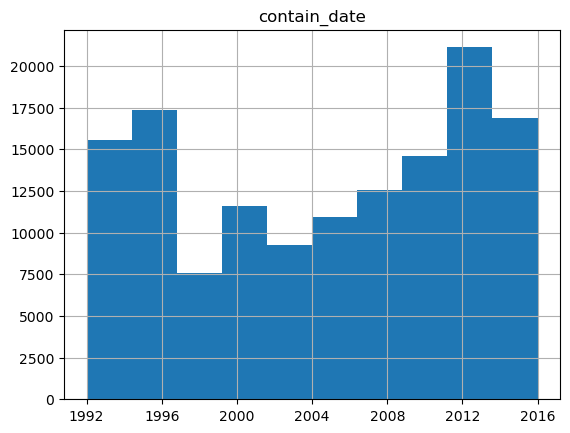

In [18]:
# Check the distribution of the values in 'contain_date' using a histogram
df.hist(column='contain_date')

In [19]:
# Count the number of instances for each unique value of the column
df['contain_date'].value_counts()

1993-03-10    215
2015-02-14    186
1992-03-02    177
2013-03-16    168
1996-02-24    167
             ... 
1995-01-29      1
1995-01-16      1
1994-03-02      1
1993-01-07      1
2015-01-02      1
Name: contain_date, Length: 8479, dtype: int64

In [20]:
# Count number of rows with and with/without missing values in 'contain_date'
print("Rows with missing values:\t", df['contain_date'].isna().sum())
print("Rows without missing values:\t", df['contain_date'].notna().sum())

# Show percentage of missing values in 'contain_date'
print("% of missing values:\t\t", round(100*df['contain_date'].isna().sum()/df.shape[0],3), '%')
print("% of not missing values:\t", round(100*df['contain_date'].notna().sum()/df.shape[0],3), '%')

Rows with missing values:	 136747
Rows without missing values:	 137376
% of missing values:		 49.885 %
% of not missing values:	 50.115 %


- Now explain whether you think the existing data is dependable or not, and whether you should/should not want to handle the missing data in `contain_date`.

The column 'contain_date' is __not dependable__ as approximately 50% of the values are missing.
- We should __not__ try to apply an __imputation__ technique to __fill the missing values__ as we are handling with dates; filling these values will add incorrect data to our dataset.
- We __cannot__ perform an __omission__ technique like __listwise deletion__ because half of our data will then be eliminated.

Therefore, we should __drop the contain_date column__ as it will not add any further value to our analysis. However, before deleting this column we must __extract important values__ like the  __fire duration (in days)__. This step will be performed next. On this new column we could definitely __replace__ the __missing values with the median or mean__ (of the existing values) using an __imputation technique__.

# II. Prepare the data

__Q9.__ Add the `fire_month` and `days_burning` columns

In [21]:
# Add 'the fire_month' column by extracting the month in the 'discovery_date' column
df['fire_month'] = df['discovery_date'].dt.month

# Add the 'days_burning' column by finding the difference in days between the discovery and containing dates
df['days_burning'] = (df['contain_date'] - df['discovery_date']).dt.days + 1

df

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,fire_month,days_burning
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,10,16.0
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,10,5.0
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20,7,1.0
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28,1,2.0
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13,2,2.0
...,...,...,...,...,...,...,...,...,...,...
1880387,Soda,24.0,CA,39.045908,-123.265522,2015,2015-07-04,2015-07-04,7,1.0
1880399,Gilman,73.0,CA,33.892120,-117.079065,2009,2009-05-03,2009-05-03,5,1.0
1880411,Terra,23.0,CA,35.985512,-118.915364,2009,2009-06-19,2009-06-19,6,1.0
1880419,Slaughterhouse,50.0,CA,32.906591,-116.942448,2010,2010-05-29,NaT,5,NaN


Let's __replace__ the __missing values__ with the __median__ as it is less suceptible to be dragged by outliers

In [22]:
# Replace the missing values in 'days_burning' with the median of the existing values
df['days_burning'].fillna(value = round(df['days_burning'].median()), inplace=True)

# Cast the 'days_burning' column as integer
df['days_burning'] = df['days_burning'].astype(int)

df

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,fire_month,days_burning
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,10,16
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,10,5
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20,7,1
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28,1,2
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13,2,2
...,...,...,...,...,...,...,...,...,...,...
1880387,Soda,24.0,CA,39.045908,-123.265522,2015,2015-07-04,2015-07-04,7,1
1880399,Gilman,73.0,CA,33.892120,-117.079065,2009,2009-05-03,2009-05-03,5,1
1880411,Terra,23.0,CA,35.985512,-118.915364,2009,2009-06-19,2009-06-19,6,1
1880419,Slaughterhouse,50.0,CA,32.906591,-116.942448,2010,2010-05-29,NaT,5,1


Now that we have __extracted useful values from 'contain_date'__, we could __drop__ this __column__ as it will not add any further value to our analysis.

In [23]:
# Drop the 'contain_date' column
df.drop('contain_date', axis=1, inplace=True)

__Q10.__ Get the statistical summary of the `days_burning` column. What trends do you see in the 3rd quartile, mean and Max length of the fires? Is or isn't anything fishy?

In [24]:
# Display statistical summary of the days_burning column
df['days_burning'].describe().T

count    274123.000000
mean          2.630994
std          11.479977
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1882.000000
Name: days_burning, dtype: float64

We visualize that:
- the __3rd quantile__ value is __1.0__
- the __mean__ value is __2.63__ 
- the __max__ value is __1882__

When comparing these 3 values we identify the presence of __outliers__, as the __3rd quantile and mean values__ are __low compared__ to the abnormally extreme value of the __max__ data point.

The 3rd quantile indicates that __75% of__ our __fires__ have __lasted 1 day__, while the other __25%__ could __last as far as 1882 days__.

These 3 values also show that our __column distribution__ is __left skewed__, as most of our data points are located on the left side of our distribution.

__Q11.__ Check the value of `days_burning` for fires that exceed 100 acres. What do you notice about the acreage and the `days_burning` for certain outliers?

In [25]:
# Show fires that lasted more that 100 days
df_outliers = df[df['days_burning'] > 100].sort_values(by='days_burning', ascending=False)

df_outliers

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,fire_month,days_burning
356156,Buenavista,120.0,CA,37.658900,-119.522800,2000,2000-08-07,8,1882
738317,NaN,52.0,SC,32.220833,-81.008333,1994,1994-02-27,2,1828
305237,Kiliovilik,100.0,AK,66.566100,-157.519400,2001,2001-06-11,6,1102
1276621,NaN,10.0,PA,40.017222,-79.827778,2002,2002-03-19,3,1097
357487,Road 09-08 wf,900.0,AL,34.449700,-85.597800,2006,2006-03-05,3,736
...,...,...,...,...,...,...,...,...,...
1802757,Bridge fire,300.0,OR,44.866100,-121.423300,2015,2015-08-12,8,101
1802758,The chops fire,50.0,OR,44.856900,-121.411100,2015,2015-08-12,8,101
1802759,The bs fire,25.0,OR,44.854400,-121.407800,2015,2015-08-12,8,101
1802760,Cowboy 7 fire,10.0,OR,44.820600,-121.363600,2015,2015-08-12,8,101


In [26]:
# Print number of fires that lasted over 100 days
print("Number of fires (rows) that lasted over 100 days:", df[df['days_burning'] > 100].shape[0])

Number of fires (rows) that lasted over 100 days: 546


In [31]:
# Show top 15 fires that lasted more days
df_outliers.head(15)

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,fire_month,days_burning
356156,Buenavista,120.0,CA,37.658900,-119.522800,2000,2000-08-07,8,1882
738317,NaN,52.0,SC,32.220833,-81.008333,1994,1994-02-27,2,1828
305237,Kiliovilik,100.0,AK,66.566100,-157.519400,2001,2001-06-11,6,1102
1276621,NaN,10.0,PA,40.017222,-79.827778,2002,2002-03-19,3,1097
357487,Road 09-08 wf,900.0,AL,34.449700,-85.597800,2006,2006-03-05,3,736
1324066,Jims branch,158.0,WV,37.511007,-81.349864,1994,1994-11-05,11,733
1227849,30305,250.0,OK,36.035600,-94.743133,2003,2003-03-25,3,732
1286275,Wildwood,48.2,WY,44.456611,-105.444111,2010,2010-08-29,8,379
365024,2100 cente,25.0,IN,38.937900,-85.423200,2001,2001-04-05,4,376
1286206,Adon road,18.0,WY,44.454340,-105.276150,2010,2010-08-22,8,375


We rapidly notice that the acreage (number of acres burned) are not related to the number of days burned.

We have some fires that lasted over 1000 days, however their acreage are extremely low (10 & 52).

These outliers demonstrate that both variables __'acres_burned'__ and __'days_burning'__ are __not correlated__.